<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
!pip install bertopic
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Load the data
df = pd.read_csv('/content/annotated_reviews.csv')

# Check the head of the DataFrame
print(df.head())

# Text column is named 'Review_clean'
text_data = df['Review_clean'].astype(str)


# Text preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lower case
    text = text.lower()
    # Tokenize text
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
text_data = text_data.apply(preprocess)

# Feature extraction for LDA and LSA
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Applying LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)

# Applying LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa.fit_transform(X_tfidf)

# Feature extraction and BERTopic modeling
bertopic_model = BERTopic(language="english", calculate_probabilities=True, nr_topics=10)
topics, probabilities = bertopic_model.fit_transform(text_data)

# Function to display topics for LDA and LSA
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics for LDA and LSA
print("\nLDA Topics:")
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), 10)

print("\nLSA Topics:")
display_topics(lsa, tfidf_vectorizer.get_feature_names_out(), 10)

# Improved topic display for BERTopic
topic_overview = bertopic_model.get_topic_info()

print("\nDetailed BERTopic Topics:")
for index, row in topic_overview.iterrows():
    if index == 0:  # Skip the -1 (outliers topic)
        continue
    topic_number = row['Topic']
    topic = bertopic_model.get_topic(topic_number)
    print(f"Topic {topic_number}: {', '.join([word for word, _ in topic[:5]])}")
    print(f"Summary: This topic primarily discusses aspects related to {' and '.join([word for word, _ in topic[:2]])}.")
    print("-" * 30)





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 20.3 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


LDA Topics:
Topic 0:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 1:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 2:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 3:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 4:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 5:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 6:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 7:
veri educ difficult thank nearli cloth rewatch wast grew low
Topic 8:
movi barbi film like world ken good watch woman realli
Topic 9:
veri educ difficult thank nearli cloth rewatch wast grew low

LSA Topics:
Topic 0:
barbi movi film world like ken woman good real realli
Topic 1:
film barbi world gerwig real ken doll barbieland robbi stereotyp
Topic 2:
barbi world ken real men woman movi barbieland doll girl
Topic 3:
robbi barbi margot movi ryan gosl perfect cast greta gerwig
Topic 4:

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import re
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/content/annotated_reviews.csv')

# Display the first few entries
print(df.head())

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower().strip()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Preprocess the review texts
df['processed_review'] = df['Review_clean'].apply(preprocess_text)

# Define features and labels
X = df['processed_review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize classifiers
nb_classifier = MultinomialNB()
svc_classifier = SVC(kernel='linear')

# Perform cross-validation and get scores
nb_cv_scores = cross_val_score(nb_classifier, X_train_vec, y_train, cv=5, scoring='accuracy')
svc_cv_scores = cross_val_score(svc_classifier, X_train_vec, y_train, cv=5, scoring='accuracy')

print(f"Naive Bayes CV Accuracy: {nb_cv_scores.mean():.2f}")
print(f"SVC CV Accuracy: {svc_cv_scores.mean():.2f}")

# Fit the classifiers on the training data
nb_classifier.fit(X_train_vec, y_train)
svc_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
nb_predictions = nb_classifier.predict(X_test_vec)
svc_predictions = svc_classifier.predict(X_test_vec)

# Calculate and print performance metrics for each classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
svc_precision = precision_score(y_test, svc_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
svc_recall = recall_score(y_test, svc_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
svc_f1 = f1_score(y_test, svc_predictions, average='weighted')

print(f"Naive Bayes - Accuracy: {nb_accuracy:.2f}, Precision: {nb_precision:.2f}, Recall: {nb_recall:.2f}, F1 Score: {nb_f1:.2f}")
print(f"SVC - Accuracy: {svc_accuracy:.2f}, Precision: {svc_precision:.2f}, Recall: {svc_recall:.2f}, F1 Score: {svc_f1:.2f}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   document_id                                       Review_clean sentiment
0            1  margot best she given film disappoint it marke...   neutral
1            2  befor make barbi greta gerwig singlehandedli d...   neutral
2            3  the qualiti humor write movi fun it quirki uni...  positive
3            4  a much pain give movi call barbi i it brillian...   neutral
4            5  a woman grew barbi i excit movi i curiou see w...   neutral
Naive Bayes CV Accuracy: 0.72
SVC CV Accuracy: 0.92
Naive Bayes - Accuracy: 0.69, Precision: 0.65, Recall: 0.69, F1 Score: 0.67
SVC - Accuracy: 0.91, Precision: 0.91, Recall: 0.91, F1 Score: 0.91


In [13]:
## Feature Selection Explanation
'''
The features selected for the sentiment classification is bag-of-words from the text data,
transformed into numerical vectors using a bag-of-words model - `CountVectorizer`.
The reason for selecting these features is because the presence and frequency of certain words are strong indicators of sentiment in text data
and they are suitable features for classifying the sentiment of reviews.
'''

'\nThe features selected for the sentiment classification is bag-of-words from the text data, \ntransformed into numerical vectors using a bag-of-words model - `CountVectorizer`.\nThe reason for selecting these features is because the presence and frequency of certain words are strong indicators of sentiment in text data \nand they are suitable features for classifying the sentiment of reviews.\n'

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

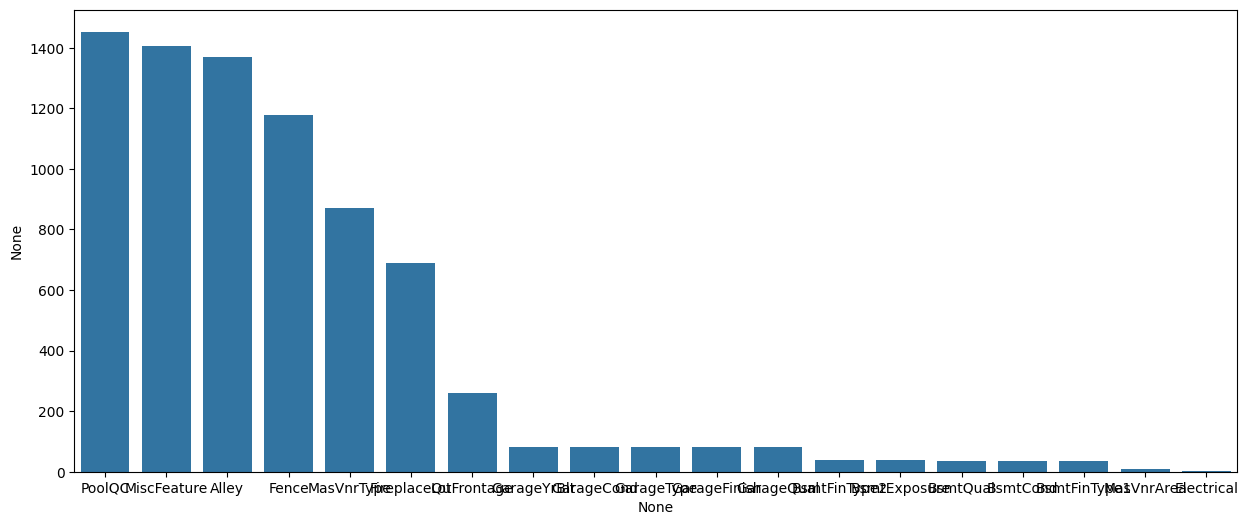

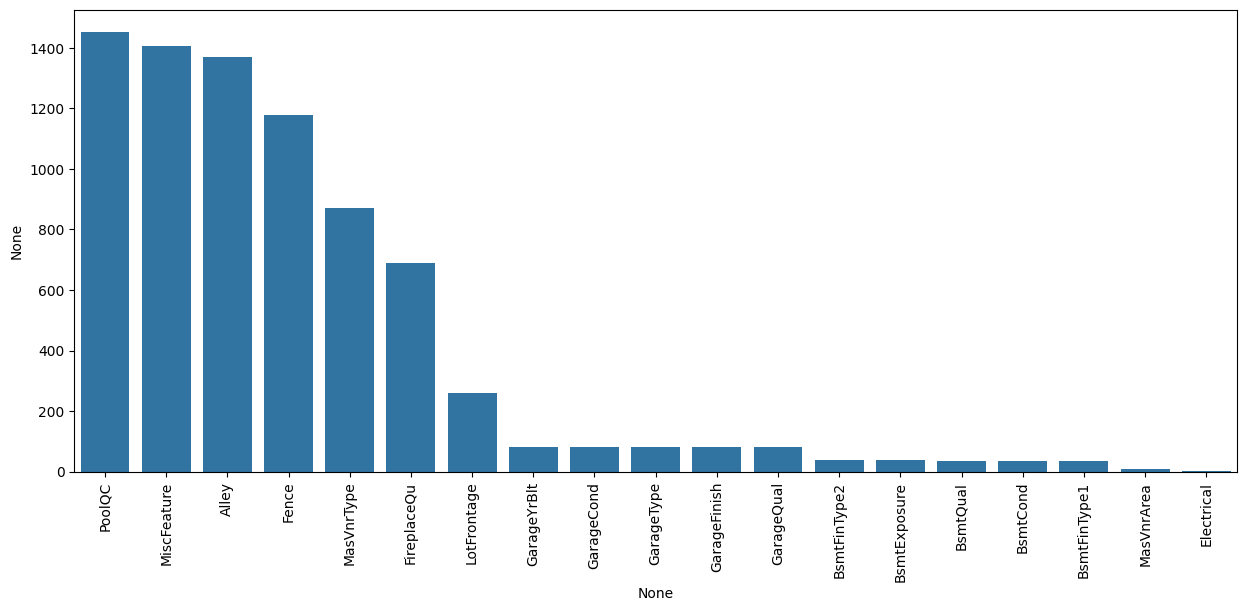

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageFinish_Unf   -0.513906
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, dtype: float64
Mean Absolute Error (MAE): 20458.75
Mean Squared Error (MSE): 2738416841.45
Root Mean Squared Error (RMSE): 52329.88
Coefficient of Determination (R^2): 0.64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
train_data = pd.read_csv('/content/train.csv')

# EDA: Overview of the data
print(train_data.head())
print(train_data.describe())

# Check for missing values and visualize them
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_values.index, y=missing_values)
# Visualizing missing values
plt.figure(figsize=(15, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)  # Corrected line
plt.show()

# Data Cleaning: Handling missing values
# Drop columns with many missing values
threshold = len(train_data) * 0.5
train_data.dropna(thresh=threshold, axis=1, inplace=True)

# Fill remaining missing values
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:
        train_data[col] = train_data[col].fillna(train_data[col].median())

# Convert categorical variables into dummy variables
train_data = pd.get_dummies(train_data, drop_first=True)

# Feature Selection based on correlation
correlation_threshold = 0.5
corr_matrix = train_data.corr()
high_corr_vars = corr_matrix.SalePrice[abs(corr_matrix.SalePrice) > correlation_threshold].sort_values(ascending=False)
print(high_corr_vars)

# Split data for training and testing
X = train_data.drop(['SalePrice', 'Id'], axis=1)  # Exclude 'Id' since it's just an identifier
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Install the transformers library which includes pre-trained models and various NLP tools
!pip install transformers
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset for sentiment analysis
data = pd.read_csv('/content/annotated_reviews.csv')
reviews = data['Review_clean'].tolist()
true_labels = data['sentiment'].tolist()

# Initialize the zero-shot classification pipeline with the pre-trained DistilBERT model
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")

# Candidate labels for sentiment classification
candidate_labels = ["positive", "negative", "neutral"]

# Classify the sentiment of each review using the zero-shot classifier
predictions = classifier(reviews, candidate_labels, truncation=True)

# Extract the highest-confidence labels from the predictions as the predicted sentiment
predicted_labels = [pred['labels'][0] for pred in predictions]

# Evaluate the performance of the PLM on the provided dataset
# Using Accuracy, Precision, Recall, and F1 metrics for evaluation
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Discussion about the selected PLM's description, advantages, disadvantages, and challenges
print("\nPLM Description:")
print("Selected PLM: 'typeform/distilbert-base-uncased-mnli'")
print("Pretraining Data Sources: DistilBERT was pretrained on the same datasets as BERT, including the Toronto Book Corpus and English Wikipedia.")
print("Number of Parameters: DistilBERT has 66 million parameters.")
print("Task-Specific Fine-Tuning: The model was fine-tuned on the MNLI dataset for natural language understanding.")

print("\nAdvantages and Disadvantages:")
print("Advantages: Faster inference and fewer resources required compared to BERT, while maintaining a significant portion of BERT's performance.")
print("Disadvantages: The reduced size may result in slightly lower accuracy on some complex tasks compared to the full BERT model.")
print("Challenges: Handling long sequences with the model's token limit can be a challenge, requiring careful management of input truncation.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecat